In [22]:
%load_ext autoreload
%autoreload 2

from copy import deepcopy
from pathlib import Path


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

from ro5utils.aws.s3 import download_s3_directory, upload_s3_file

from mapk1_processing import read_data, get_joint_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading data

In [5]:
MAPK1_DIR = Path("/Users/povilas/projects/2021-10_Strateos/data/mapk1/")
PROCESSED_OUTPUTS = MAPK1_DIR / "processed_outputs"

In [8]:
# download_s3_directory("strateos",
#                       "data/mapk1/processed_outputs",
#                       PROCESSED_OUTPUTS)

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:ro5utils.aws.s3:Downloading from S3://strateos/data/mapk1/processed_outputs to local directory /Users/povilas/projects/2021-10_Strateos/data/mapk1/processed_outputs...
100%|█████████████████████████████████████████████████████████████| 4/4 [02:41<00:00, 40.47s/it]


[PosixPath('/Users/povilas/projects/2021-10_Strateos/data/mapk1/processed_outputs/mapk1_pharmit.csv'),
 PosixPath('/Users/povilas/projects/2021-10_Strateos/data/mapk1/processed_outputs/mapk1_shape_decaf.csv'),
 PosixPath('/Users/povilas/projects/2021-10_Strateos/data/mapk1/processed_outputs/mapk1_shape_usrcat.csv'),
 PosixPath('/Users/povilas/projects/2021-10_Strateos/data/mapk1/processed_outputs/mapk1_tanimoto.csv')]

In [36]:
df = pd.read_csv(PROCESSED_OUTPUTS/"mapk1_pharmit.csv")

/Users/povilas/.pyenv/versions/3.9.1/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
df = df.sort_values(["ph4_auc"], ascending=False)
df = df.reset_index(drop=True)
df["conformer_rank"] = df.groupby(["hypothesis", "name"]).cumcount() + 1

In [48]:
df["stereoisomer"] = df["name"].apply(lambda x: len(x.split("_")) > 3)

In [51]:
df.head()

name  ph4_auc  num_points  num_hp_points   rmsd  \
0  31019_31043_Inconclusive    0.998         3.0              3  0.007   
1      45570_45606_Inactive    0.997         3.0              3  0.008   
2  54997_55033_Inconclusive    0.997         3.0              3  0.008   
3    25223_25247_Inactive_3    0.997         3.0              3  0.010   
4      28515_28539_Inactive    0.997         3.0              3  0.008   

    score  norm_score ph4_points  hypothesis  conformer_rank  stereoisomer  
0  38.979       0.999      0,1,2  6Q7K_A_2AI               1         False  
1  38.976       0.999      0,1,2  6Q7K_A_2AI               1         False  
2  38.976       0.999      0,1,2  6Q7K_A_2AI               1         False  
3  38.970       0.999      0,1,2  6Q7K_A_2AI               1          True  
4  38.976       0.999      0,1,2  6Q7K_A_2AI               1         False

In [54]:
df.query("conformer_rank > 5 and stereoisomer == False and ph4_auc > 0")

name  ph4_auc  num_points  num_hp_points   rmsd  \
1818503  36103_36131_Inactive    0.275         3.0              5  0.521   
4811652    3032_3034_Inactive    0.168         3.0              7  0.473   
5157816  36103_36131_Inactive    0.160         3.0              7  0.604   
5559450    3032_3034_Inactive    0.153         3.0              7  0.700   
5898632  36103_36131_Inactive    0.146         3.0              8  0.372   
6054088  36103_36131_Inactive    0.142         3.0              8  0.441   
6126251    3032_3034_Inactive    0.141         3.0              8  0.460   
6130533    3032_3034_Inactive    0.140         3.0              8  0.487   
6199577  36103_36131_Inactive    0.139         3.0              8  0.496   
6255232  36103_36131_Inactive    0.138         3.0              8  0.511   
6329705    3032_3034_Inactive    0.136         3.0              8  0.560   
6413983  36103_36131_Inactive    0.135         3.0              8  0.570   
6515869    3032_3034_Inactive    0.133         3.0              8  0.611   
7021623    3032_3034_Inactive    0.122         3.0              9  0.441   
7100698  36103_36131_Inactive    0.121         3.0              9  0.463   
7202482    3032_3034_Inactive    0.118         3.0              9  0.524   
7214768    3032_3034_Inactive    0.118         3.0              9  0.515   
7223007    3032_3034_Inactive    0.118         3.0              9  0.521   
7260647  36103_36131_Inactive    0.117         3.0              9  0.534   
7407572  36103_36131_Inactive    0.114         3.0              9  0.601   
7410385    3032_3034_Inactive    0.114         3.0              9  0.615   
7493390  36103_36131_Inactive    0.111         3.0              9  0.678   
7879642  36103_36131_Inactive    0.100         3.0             11  0.302   
7932685  36103_36131_Inactive    0.098         3.0             11  0.346   
7946630  36103_36131_Inactive    0.098         3.0             11  0.358   
8085341    3032_3034_Inactive    0.094         3.0             11  0.449   
8509134  36103_36131_Inactive    0.081         3.0             13  0.342   
8583936  36103_36131_Inactive    0.079         3.0             12  0.636   
8783125    3032_3034_Inactive    0.069         3.0             14  0.525   
8803008  36103_36131_Inactive    0.067         3.0             14  0.591   
8816095  36103_36131_Inactive    0.065         3.0             14  0.672   
8820246    3032_3034_Inactive    0.063         3.0             14  0.746   
8834296  36103_36131_Inactive    0.059         3.0             18  0.147   
8847361    3032_3034_Inactive    0.054         3.0             18  0.397   
8850459  36103_36131_Inactive    0.051         3.0             18  0.547   

          score  norm_score ph4_points  hypothesis  conformer_rank  \
1818503  37.437       0.635      1,3,4  4FUX_A_E75               6   
4811652  37.581       0.476      3,4,5  5NHJ_A_8XE               6   
5157816  37.188       0.471      2,5,6  4FV4_A_EK7               6   
5559450  36.900       0.467      3,4,5  4QP9_A_35X               6   
5898632  37.884       0.426      5,6,7  5NHO_A_8XN               6   
6054088  37.677       0.423      5,6,7  5NHP_A_8XK               6   
6126251  37.620       0.423      3,5,6  5NHP_A_8XK               6   
6130533  37.539       0.422      4,5,7  6G92_A_ERZ               6   
6199577  37.512       0.421      2,4,6  5NHO_A_8XN               7   
6255232  37.467       0.421      5,6,7  5NHP_A_8XK               7   
6329705  37.320       0.419      4,6,7  5NHO_A_8XN               6   
6413983  37.290       0.419      1,4,5  6G92_A_ERZ               6   
6515869  37.167       0.418      4,5,6  4FV7_A_E94               6   
7021623  37.677       0.381      2,6,7  6OPH_A_6QB               6   
7100698  37.611       0.380      2,6,7  6OPH_A_6QB               6   
7202482  37.428       0.378      5,7,8  6RQ4_A_KE8               6   
7214768  37.455       0.378      6,7,8  5NHL_A_8XB               6   
7223007  37.437       0.378 

In [56]:
df.query(""" name == '36103_36131_Inactive' and hypothesis == '4FUX_A_E75' """)

name  ph4_auc  num_points  num_hp_points   rmsd  \
111977   36103_36131_Inactive    0.541         4.0              5  0.652   
1659792  36103_36131_Inactive    0.282         3.0              5  0.459   
1709016  36103_36131_Inactive    0.280         3.0              5  0.484   
1728712  36103_36131_Inactive    0.279         3.0              5  0.488   
1789544  36103_36131_Inactive    0.276         3.0              5  0.517   
1818503  36103_36131_Inactive    0.275         3.0              5  0.521   
9675202  36103_36131_Inactive    0.000         NaN              5    NaN   

          score  norm_score ph4_points  hypothesis  conformer_rank  \
111977   47.044       0.797    1,2,3,4  4FUX_A_E75               1   
1659792  37.623       0.638      1,3,4  4FUX_A_E75               2   
1709016  37.548       0.636      1,3,4  4FUX_A_E75               3   
1728712  37.536       0.636      1,3,4  4FUX_A_E75               4   
1789544  37.449       0.635      1,3,4  4FUX_A_E75               5   
1818503  37.437       0.635      1,3,4  4FUX_A_E75               6   
9675202   0.000       0.000        NaN  4FUX_A_E75               7   

         stereoisomer  
111977          False  
1659792         False  
1709016         False  
1728712         False  
1789544         False  
1818503         False  
9675202         False

In [35]:
df.head()

name  ph4_auc  num_points  num_hp_points   rmsd  \
0  31019_31043_Inconclusive    0.998         3.0              3  0.007   
1      45570_45606_Inactive    0.997         3.0              3  0.008   
2  54997_55033_Inconclusive    0.997         3.0              3  0.008   
3    25223_25247_Inactive_3    0.997         3.0              3  0.010   
4      28515_28539_Inactive    0.997         3.0              3  0.008   

    score  norm_score ph4_points  hypothesis  method_rank  hypothesis_rank  \
0  38.979       0.999      0,1,2  6Q7K_A_2AI            1                1   
1  38.976       0.999      0,1,2  6Q7K_A_2AI            2                2   
2  38.976       0.999      0,1,2  6Q7K_A_2AI            3                3   
3  38.970       0.999      0,1,2  6Q7K_A_2AI            4                4   
4  38.976       0.999      0,1,2  6Q7K_A_2AI            5                5   

   compound_rank  
0              1  
1              1  
2              1  
3              1  
4              1

In [58]:
df = read_data("tanimoto", data_dir=PROCESSED_OUTPUTS)

In [59]:
df

name  hypothesis  score     label  method_rank  \
0        57906_57942_Inactive  4ZXT_A_CAQ    1.0  Inactive            1   
1        19171_19195_Inactive  4QP2_A_36R    1.0  Inactive            2   
2        69366_69407_Inactive  4QP2_A_36R    1.0  Inactive            3   
3        24671_24695_Inactive  4N0S_A_DHC    1.0  Inactive            4   
4        57494_57530_Inactive  4N0S_A_DHC    1.0  Inactive            5   
...                       ...         ...    ...       ...          ...   
5540845  62691_62732_Inactive  4QTA_A_38Z    0.0  Inactive      5540846   
5540846  58605_58641_Inactive  6GE0_A_EVQ    0.0  Inactive      5540847   
5540847  64365_64406_Inactive  4ZXT_A_CAQ    0.0  Inactive      5540848   
5540848  43254_43290_Inactive  4QTA_A_38Z    0.0  Inactive      5540849   
5540849  62691_62732_Inactive  4FV5_A_EK9    0.0  Inactive      5540850   

         hypothesis_rank  compound_rank  conservative_label  liberal_label  
0                      1              1                   0              0  
1                      1              1                   0              0  
2                      2              1                   0              0  
3                      1              1                   0              0  
4                      2              1                   0              0  
...                  ...            ...                 ...            ...  
5540845            52769            104                   0              0  
5540846            52770            105                   0              0  
5540847            52770            105                   0              0  
5540848            52770            105                   0              0  
5540849            52770            105                   0              0  

[5540850 rows x 9 columns]

# Generate joint DF

In [9]:
joint_df = get_joint_df(data_dir=PROCESSED_OUTPUTS)

/Users/povilas/code/strateos/results/mapk1/mapk1_processing.py:92: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  all_tables = {method: read_data(method, data_dir=data_dir) for method in methods}


In [10]:
joint_df.shape

(21905305, 9)

In [17]:
joint_df_parquet_file = MAPK1_DIR/"mapk1_joint_results.parquet.gzip"
joint_df_csv_file = MAPK1_DIR/"mapk1_joint_results.csv.gz"

In [ ]:
# joint_df = joint_df.reset_index()=
# joint_df = joint_df.drop(columns=['level_1'])

In [31]:
joint_df.to_parquet(joint_df_parquet_file, compression='gzip') # Requires pyarrow dependency

joint_df.to_csv(joint_df_csv_file,
                header=True,
                index=False,
                chunksize=1000000,
                compression='gzip',
                encoding='utf-8')

In [32]:
upload_s3_file(joint_df_csv_file, "strateos", "data/mapk1/mapk1_joint_results.csv.gz", overwrite=True)
upload_s3_file(joint_df_parquet_file, "strateos", "data/mapk1/mapk1_joint_results.parquet.gzip", overwrite=True)

True

In [43]:
# removing stereoisomers -> ~53k datapoints left (586 of which are active)

In [48]:
# df_dict = {
#     'decaf' : read_data('decaf'),
#     'usrcat' : read_data('usrcat'),
#     'ph4' : read_data('ph4')
# }
# df_dict['tanimoto'] = read_data('tanimoto')

# Hit selection based on tail or threshold

In [64]:
def select_hits(method, threshold = None, nn = 20):
    # given a threshold value or number of top elements, select the DataFrame rows containing them
    # returns dictionary of DataFrames for each reference
    hyp_to_hits = {}
    df = df_dict[method]
    
    if method == 'decaf':
        if threshold is not None:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df[df[col] > threshold])
                hyp_to_hits[col] = select_df
        else:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df.sort_values(by=col, ascending=False))
                hyp_to_hits[col] = select_df.iloc[:nn]
                
    elif method == 'usrcat':
        if threshold is not None:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df[df[col] > threshold])
                hyp_to_hits[col] = select_df
        else:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df.sort_values(by=col, ascending=False))
                hyp_to_hits[col] = select_df.iloc[:nn]
                
    elif method == 'ph4':
        if threshold is not None:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df[df[col] > threshold])
                hyp_to_hits[col] = select_df
        else:
            all_refs = [s for s in df.columns if s != 'label']
            for col in all_refs:
                select_df = deepcopy(df.sort_values(by=col, ascending=False))
                hyp_to_hits[col] = select_df.iloc[:nn]
                
    elif method == 'tanimoto':
        if threshold is not None:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df[df[col] > threshold])
                hyp_to_hits[col] = select_df
        else:
            all_refs = [s for s in df.columns if s.endswith('_ligand')]
            for col in all_refs:
                select_df = deepcopy(df.sort_values(by=col, ascending=False))
                hyp_to_hits[col] = select_df.iloc[:nn]
    
    return hyp_to_hits

In [ ]:
# uncomment below to get printouts of per-reference hitrates

In [39]:
# method = 'decaf'
# nn = 50
# hyp_to_hits = select_hits(method, threshold=None, nn = nn)
# print(method)
# for k,v in hyp_to_hits.items(): print(k.strip('_ligand'), f'top-{nn} similarity actives:', len(v[v['label'] == 'Active']), '/', len(v))

In [40]:
# method = 'usrcat'
# nn = 50
# hyp_to_hits = select_hits(method, threshold=None, nn = nn)
# print(method)
# for k,v in hyp_to_hits.items(): print(k.strip('_ligand'), f'top-{nn} similarity actives:', len(v[v['label'] == 'Active']), '/', len(v))

In [41]:
# method = 'ph4'
# nn = 50
# hyp_to_hits = select_hits(method, threshold=None, nn = nn)
# print(method)
# for k,v in hyp_to_hits.items(): print(k.strip('_ligand'), f'top-{nn} similarity actives:', len(v[v['label'] == 'Active']), '/', len(v))

# Hitrate vs tail size

In [54]:
def get_hitrate(method, threshold=None, nn=20):
    hits = select_hits(method, threshold=threshold, nn=nn)
    total = 0
    act = 0
    for k,v in hits.items():
        total += len(v)
        act += len(v[v['label'] == 'Active'])
    rrr = round( 100 * act / total , 2 )
    print(f'top-{nn}', method, 'average hitrate:', rrr, '%')
    return rrr

In [65]:
# inefficient and nonparallelized, takes a minute
mth = {}
methods = ['tanimoto', 'decaf', 'usrcat', 'ph4']
nums = [10, 20, 30, 40, 50, 100, 200]
for method in methods:
    for nn in nums:
        r = get_hitrate(method, nn=nn)
        if method not in mth.keys(): mth[method] = { nn : r }
        else: mth[method][nn] = r

top-10 tanimoto average hitrate: 1.33 %
top-20 tanimoto average hitrate: 2.05 %
top-30 tanimoto average hitrate: 1.97 %
top-40 tanimoto average hitrate: 2.07 %
top-50 tanimoto average hitrate: 1.92 %
top-100 tanimoto average hitrate: 1.59 %
top-200 tanimoto average hitrate: 1.8 %
top-10 decaf average hitrate: 4.76 %
top-20 decaf average hitrate: 4.9 %
top-30 decaf average hitrate: 4.6 %
top-40 decaf average hitrate: 4.57 %
top-50 decaf average hitrate: 4.57 %
top-100 decaf average hitrate: 3.27 %
top-200 decaf average hitrate: 3.35 %
top-10 usrcat average hitrate: 1.9 %
top-20 usrcat average hitrate: 1.57 %
top-30 usrcat average hitrate: 1.52 %
top-40 usrcat average hitrate: 1.5 %
top-50 usrcat average hitrate: 1.5 %
top-100 usrcat average hitrate: 1.53 %
top-200 usrcat average hitrate: 1.58 %
top-10 ph4 average hitrate: 3.7 %
top-20 ph4 average hitrate: 2.85 %
top-30 ph4 average hitrate: 2.33 %
top-40 ph4 average hitrate: 2.27 %
top-50 ph4 average hitrate: 2.26 %
top-100 ph4 average h

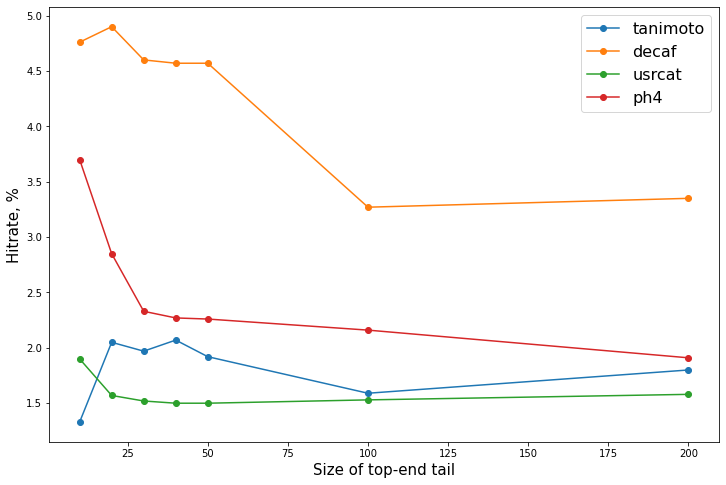

In [69]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
for label in mth.keys():
    x = mth[label].keys()
    y = mth[label].values()
    plt.plot(x,y, marker='o', label=label)
    
plt.legend(fontsize=16);
plt.xlabel('Size of top-end tail', fontsize=15)
plt.ylabel('Hitrate, %', fontsize=15);
# plt.savefig('figures/mapk1_eval_initial.png', bbox_width='tight')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Aggregated hitrate

Potential issue with previous hitrate: some references lead to highly correlated scores. To alleviate this, we evaluate the models by investigating the set of all unique molecules predicted (from all hypotheses) as hits rather than each hypothesis individually.

In [78]:
def get_agg_hitrate(method, threshold=None, nn=20):
    hits = select_hits(method, threshold=threshold, nn=nn)
    predicted_set = []
    active_set = []
    for k,v in hits.items():
        
        full_set = list(v['name'])
        label_set = list(v['label'])
        for a in full_set: 
            if a not in predicted_set: predicted_set.append(a)
        for ii, a in enumerate(full_set): 
            if a not in active_set and label_set[ii] == 'Active': active_set.append(a)
        
    rrr = round( 100 * len(active_set) / len(predicted_set) , 2 )
    print(f'top-{nn}', method, 'average hitrate:', rrr, '%', f'({len(active_set)} out of {len(predicted_set)})')
    return rrr

In [79]:
hits = get_agg_hitrate('usrcat', threshold=None, nn=20)

top-20 usrcat average hitrate: 1.73 % (26 out of 1502)


In [88]:
# inefficient and nonparallelized, takes a minute
mth = {}
methods = ['tanimoto', 'decaf', 'usrcat', 'ph4']
nums = [10, 20, 30, 40, 50, 100, 200]
for method in methods:
    for nn in nums:
        r = get_agg_hitrate(method, nn=nn)
        if method not in mth.keys():
            mth[method] = { nn : r }
        else:
            mth[method][nn] = r

top-10 tanimoto average hitrate: 1.69 % (11 out of 651)
top-20 tanimoto average hitrate: 1.66 % (20 out of 1208)
top-30 tanimoto average hitrate: 1.82 % (32 out of 1757)
top-40 tanimoto average hitrate: 1.96 % (44 out of 2250)
top-50 tanimoto average hitrate: 1.83 % (50 out of 2735)
top-100 tanimoto average hitrate: 1.7 % (83 out of 4889)
top-200 tanimoto average hitrate: 1.59 % (137 out of 8613)
top-10 decaf average hitrate: 4.44 % (21 out of 473)
top-20 decaf average hitrate: 3.85 % (33 out of 858)
top-30 decaf average hitrate: 3.57 % (43 out of 1203)
top-40 decaf average hitrate: 3.35 % (52 out of 1551)
top-50 decaf average hitrate: 3.35 % (63 out of 1882)
top-100 decaf average hitrate: 2.42 % (82 out of 3393)
top-200 decaf average hitrate: 2.23 % (131 out of 5885)
top-10 usrcat average hitrate: 2.15 % (17 out of 791)
top-20 usrcat average hitrate: 1.73 % (26 out of 1502)
top-30 usrcat average hitrate: 1.66 % (36 out of 2167)
top-40 usrcat average hitrate: 1.69 % (47 out of 2781)
to

/opt/anaconda3/envs/mol_clust/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_width" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


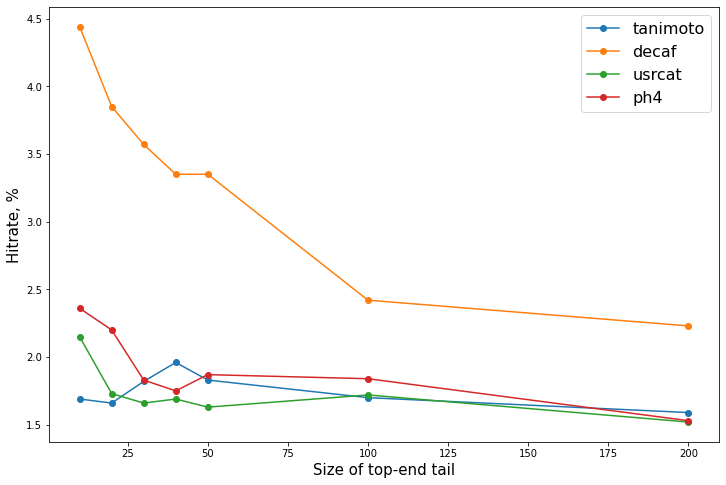

In [89]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
for label in mth.keys():
    x = mth[label].keys()
    y = mth[label].values()
    plt.plot(x,y, marker='o', label=label)
    
plt.legend(fontsize=16);
plt.xlabel('Size of top-end tail', fontsize=15)
plt.ylabel('Hitrate, %', fontsize=15);
plt.savefig('figures/mapk1_eval_aggregated.png', bbox_width='tight');

# Roughwork

In [94]:
df_dict['decaf'][df_dict['decaf']['6G93_A_EU2_ligand'] > 0.8]

name  6G93_A_EU2_ligand  1TVO_A_FRZ_ligand  \
672     28285_28309_Inactive              0.815              0.618   
1233    20642_20666_Inactive              0.832              0.597   
1369    37486_37515_Inactive              0.834              0.630   
1704    13101_13122_Inactive              0.892              0.661   
1837    31542_31566_Inactive              0.925              0.686   
...                      ...                ...                ...   
111895  31900_31924_Inactive              0.802              0.569   
111987  49103_49139_Inactive              0.891              0.682   
112541  45665_45701_Inactive              0.815              0.679   
113183  59260_59296_Inactive              0.839              0.701   
113564  35968_35995_Inactive              0.909              0.699   

        6G9J_A_ERK_ligand  2Y9Q_A_ANP_ligand  4QP7_A_363_ligand  \
672                 0.681              0.401              0.699   
1233                0.700              0.453              0.670   
1369                0.717              0.428              0.666   
1704                0.758              0.477              0.748   
1837                0.781              0.461              0.773   
...                   ...                ...                ...   
111895              0.686              0.407              0.610   
111987              0.768              0.447              0.740   
112541              0.687              0.498              0.766   
113183              0.706              0.447              0.797   
113564              0.772              0.433              0.761   

        5AX3_A_5ID_ligand  5BUJ_A_4VB_ligand  1WZY_A_F29_ligand  \
672                 0.548              0.595              0.598   
1233                0.595              0.565              0.580   
1369                0.531              0.604              0.614   
1704                0.622              0.637              0.643   
1837                0.599              0.664              0.665   
...                   ...                ...                ...   
111895              0.509              0.575              0.554   
111987              0.573              0.651              0.664   
112541              0.622              0.655              0.658   
113183              0.609              0.680              0.680   
113564              0.568              0.657              0.679   

        4QTA_A_38Z_ligand  ...  7NR3_A_UO5_ligand  6GDQ_A_EVK_ligand  \
672                 0.415  ...              0.644              0.528   
1233                0.410  ...              0.663              0.470   
1369                0.452  ...              0.683              0.551   
1704                0.467  ...              0.720              0.546   
1837                0.464  ...              0.741              0.644   
...                   ...  ...                ...                ...   
111895              0.400  ...              0.652              0.502   
111987              0.494  ...              0.732              0.590   
112541              0.455  ...              0.650              0.578   
113183              0.472  ...              0.669              0.579   
113564              0.466  ...              0.733              0.639   

        6G9M_A_ESW_ligand  7OPM_A_08G_ligand  4XJ0_A_41B_ligand  \
672                 0.668              0.543              0.697   
1233                0.687              0.536              0.677   
1369                0.705              0.518              0.699   
1704                0.745              0.543              0.742   
1837                0.767              0.588              0.807   
...                   ...                ...                ...   
111895              0.674              0.684              0.664   
111987              0.756              0.475              0.754   
112541              0.674              0.722              0.687   
113183              0.693             

{'6G93_A_EU2_ligand': Empty DataFrame
 Columns: [name, 6G93_A_EU2_ligand, 1TVO_A_FRZ_ligand, 6G9J_A_ERK_ligand, 2Y9Q_A_ANP_ligand, 4QP7_A_363_ligand, 5AX3_A_5ID_ligand, 5BUJ_A_4VB_ligand, 1WZY_A_F29_ligand, 4QTA_A_38Z_ligand, 2OJI_A_33A_ligand, 1PME_A_SB2_ligand, 2OJG_A_19A_ligand, 4QP2_A_36R_ligand, 4ZZO_A_CQ3_ligand, 5BVE_A_4VG_ligand, 3I5Z_A_Z48_ligand, 4FUY_A_EK2_ligand, 4QP4_A_36O_ligand, 4N0S_A_DHC_ligand, 5BUE_A_4V8_ligand, 5LCJ_A_6TS_ligand, 4FUX_A_E75_ligand, 3I60_A_E86_ligand, 3W55_A_1FM_ligand, 5BUI_A_4V9_ligand, 6G97_A_EQZ_ligand, 4FV0_A_EK3_ligand, 3TEI_A_ANP_ligand, 5WP1_A_B7S_ligand, 4FV3_A_EK6_ligand, 6GE0_A_EVQ_ligand, 4FV2_A_EK5_ligand, 6G9K_A_ESK_ligand, 3SA0_A_NRA_ligand, 4FV4_A_EK7_ligand, 6G9H_A_ERW_ligand, 4QP3_B_36Q_ligand, 5LCK_A_6TT_ligand, 6G91_A_EQW_ligand, 2OJJ_A_82A_ligand, 4FMQ_A_ANP_ligand, 4FV8_A_E63_ligand, 6G9A_A_ESQ_ligand, 4FV6_A_E57_ligand, 4G6N_A_EK0_ligand, 4QTE_A_390_ligand, 5K4I_A_6QB_ligand, 5NHJ_A_8XE_ligand, 4FV5_A_EK9_ligand, 4FV9_A_E71_lig

In [66]:
a = df_dict['decaf']
# a.head(30)

nan

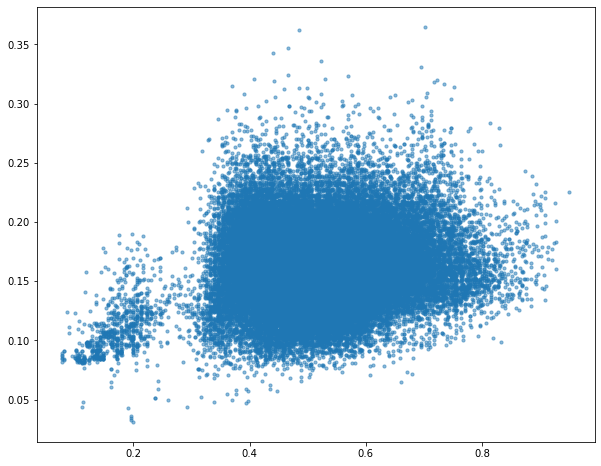

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ref = '6G93_A_EU2_ligand'

x = np.array(df_dict['decaf'][ref])
y = np.array(df_dict['usrcat'][ref])
plt.scatter(x, y, s= 10, alpha=0.5);
np.corrcoef(x,y)[0][1]

In [22]:
df_dict['decaf'].corr()

6G93_A_EU2_ligand  1TVO_A_FRZ_ligand  6G9J_A_ERK_ligand  \
6G93_A_EU2_ligand           1.000000           0.544194           0.953699   
1TVO_A_FRZ_ligand           0.544194           1.000000           0.522049   
6G9J_A_ERK_ligand           0.953699           0.522049           1.000000   
2Y9Q_A_ANP_ligand           0.640485           0.668875           0.604057   
4QP7_A_363_ligand           0.749987           0.780103           0.700404   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.827759           0.350618           0.804465   
7NR8_A_UOE_ligand           0.921397           0.501353           0.964506   
7NR5_A_UOH_ligand           0.911008           0.561879           0.961445   
6QAW_A_HVE_ligand           0.704968           0.709406           0.646034   
7NR9_A_UOW_ligand           0.951076           0.508844           0.992085   

                   2Y9Q_A_ANP_ligand  4QP7_A_363_ligand  5AX3_A_5ID_ligand  \
6G93_A_EU2_ligand           0.640485           0.749987           0.657564   
1TVO_A_FRZ_ligand           0.668875           0.780103           0.670440   
6G9J_A_ERK_ligand           0.604057           0.700404           0.603969   
2Y9Q_A_ANP_ligand           1.000000           0.838836           0.885426   
4QP7_A_363_ligand           0.838836           1.000000           0.905761   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.502393           0.549035           0.481708   
7NR8_A_UOE_ligand           0.597002           0.661767           0.563993   
7NR5_A_UOH_ligand           0.648219           0.742668           0.643770   
6QAW_A_HVE_ligand           0.847910           0.941186           0.921210   
7NR9_A_UOW_ligand           0.598268           0.688152           0.591002   

                   5BUJ_A_4VB_ligand  1WZY_A_F29_ligand  4QTA_A_38Z_ligand  \
6G93_A_EU2_ligand           0.817250           0.549534           0.478313   
1TVO_A_FRZ_ligand           0.666926           0.994342           0.804271   
6G9J_A_ERK_ligand           0.805180           0.533640           0.491133   
2Y9Q_A_ANP_ligand           0.752623           0.667209           0.578538   
4QP7_A_363_ligand           0.870824           0.773581           0.614739   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.621564           0.360453           0.328170   
7NR8_A_UOE_ligand           0.785626           0.514654           0.510260   
7NR5_A_UOH_ligand           0.854525           0.573923           0.513297   
6QAW_A_HVE_ligand           0.834682           0.703363           0.595187   
7NR9_A_UOW_ligand           0.807017           0.521009           0.485976   

                   2OJI_A_33A_ligand  ...  7NQQ_A_UMN_ligand  \
6G93_A_EU2_ligand           0.258903  ...           0.689930   
1TVO_A_FRZ_ligand           0.700363  ...           0.363385   
6G9J_A_ERK_ligand           0.266860  ...           0.726754   
2Y9Q_A_ANP_ligand           0.417079  ...           0.471195   
4QP7_A_363_ligand           0.498542  ...           0.555323   
...                              ...  ...                ...   
4XJ0_A_41B_ligand           0.081275  ...           0.547273   
7NR8_A_UOE_ligand           0.243937  ...           0.700801   
7NR5_A_UOH_ligand           0.296512  ...           0.700280   
6QAW_A_HVE_ligand           0.424069  ...           0.496490   
7NR9_A_UOW_ligand           0.254780  ...           0.719674   

                   7NR3_A_UO5_ligand  6GDQ_A_EVK_ligand  6G9M_A_ESW_ligand  \
6G93_A_EU2_ligand           0.494312           0.486941           0.948777   
1TVO_A_FRZ_ligand           0.753854           0.485854           0.525542   
6G9J_A_ERK_ligand           0.522597           0.474625           0.998627   
2Y9Q_A_ANP_ligand           0.383189           0.534478           0.600119   
4QP7_A_363_ligand           0.437000           0.

In [23]:
df_dict['usrcat'].corr()

6G93_A_EU2_ligand  1TVO_A_FRZ_ligand  6G9J_A_ERK_ligand  \
6G93_A_EU2_ligand           1.000000           0.730696          -0.208630   
1TVO_A_FRZ_ligand           0.730696           1.000000          -0.348807   
6G9J_A_ERK_ligand          -0.208630          -0.348807           1.000000   
2Y9Q_A_ANP_ligand           0.740638           0.374291           0.025792   
4QP7_A_363_ligand           0.577764           0.610375          -0.664051   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.746918           0.697457           0.197422   
7NR8_A_UOE_ligand          -0.171638          -0.330886           0.973855   
7NR5_A_UOH_ligand          -0.146571          -0.312780           0.966706   
6QAW_A_HVE_ligand           0.583743           0.567173          -0.668096   
7NR9_A_UOW_ligand          -0.153864          -0.312989           0.973651   

                   2Y9Q_A_ANP_ligand  4QP7_A_363_ligand  5AX3_A_5ID_ligand  \
6G93_A_EU2_ligand           0.740638           0.577764           0.734641   
1TVO_A_FRZ_ligand           0.374291           0.610375           0.589519   
6G9J_A_ERK_ligand           0.025792          -0.664051          -0.591358   
2Y9Q_A_ANP_ligand           1.000000           0.320811           0.540484   
4QP7_A_363_ligand           0.320811           1.000000           0.906902   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.640784           0.183409           0.287722   
7NR8_A_UOE_ligand           0.074853          -0.646652          -0.557421   
7NR5_A_UOH_ligand           0.085575          -0.642573          -0.548433   
6QAW_A_HVE_ligand           0.372274           0.929048           0.910153   
7NR9_A_UOW_ligand           0.088944          -0.644488          -0.554653   

                   5BUJ_A_4VB_ligand  1WZY_A_F29_ligand  4QTA_A_38Z_ligand  \
6G93_A_EU2_ligand           0.889212           0.755019          -0.247960   
1TVO_A_FRZ_ligand           0.708097           0.740601          -0.362968   
6G9J_A_ERK_ligand          -0.097499          -0.194369           0.941080   
2Y9Q_A_ANP_ligand           0.714094           0.510106          -0.055505   
4QP7_A_363_ligand           0.507752           0.461369          -0.672724   
...                              ...                ...                ...   
4XJ0_A_41B_ligand           0.821691           0.732402           0.131710   
7NR8_A_UOE_ligand          -0.074047          -0.192144           0.936884   
7NR5_A_UOH_ligand          -0.052324          -0.166176           0.936966   
6QAW_A_HVE_ligand           0.443299           0.402071          -0.682738   
7NR9_A_UOW_ligand          -0.056005          -0.174679           0.926219   

                   2OJI_A_33A_ligand  ...  7NQQ_A_UMN_ligand  \
6G93_A_EU2_ligand           0.691836  ...          -0.205145   
1TVO_A_FRZ_ligand           0.655847  ...          -0.350281   
6G9J_A_ERK_ligand           0.152935  ...           0.990106   
2Y9Q_A_ANP_ligand           0.574974  ...           0.038499   
4QP7_A_363_ligand           0.170384  ...          -0.656134   
...                              ...  ...                ...   
4XJ0_A_41B_ligand           0.919945  ...           0.201891   
7NR8_A_UOE_ligand           0.154563  ...           0.979398   
7NR5_A_UOH_ligand           0.179233  ...           0.973597   
6QAW_A_HVE_ligand           0.159170  ...          -0.661412   
7NR9_A_UOW_ligand           0.182247  ...           0.973449   

                   7NR3_A_UO5_ligand  6GDQ_A_EVK_ligand  6G9M_A_ESW_ligand  \
6G93_A_EU2_ligand           0.123497           0.064406           0.152054   
1TVO_A_FRZ_ligand          -0.054170          -0.099079          -0.081500   
6G9J_A_ERK_ligand           0.687648           0.848172           0.828683   
2Y9Q_A_ANP_ligand           0.328807           0.292626           0.370201   
4QP7_A_363_ligand          -0.477527          -0.

In [90]:
df_dict['tanimoto'].corr()

6G93_A_EU2_ligand  1TVO_A_FRZ_ligand  6G9J_A_ERK_ligand  \
6G93_A_EU2_ligand           1.000000           0.359102           0.720504   
1TVO_A_FRZ_ligand           0.359102           1.000000           0.240102   
6G9J_A_ERK_ligand           0.720504           0.240102           1.000000   
2Y9Q_A_ANP_ligand           0.426925           0.255412           0.420833   
4QP7_A_363_ligand           0.440788           0.674484           0.163013   
...                              ...                ...                ...   
7NR5_A_UOH_ligand           0.298898           0.238514           0.529121   
6QAW_A_HVE_ligand           0.473668           0.215573           0.272214   
7NR9_A_UOW_ligand           0.559173           0.146717           0.777846   
base_index                 -0.020200          -0.006329          -0.044594   
Max_Response               -0.047184          -0.104151          -0.004672   

                   2Y9Q_A_ANP_ligand  4QP7_A_363_ligand  5AX3_A_5ID_ligand  \
6G93_A_EU2_ligand           0.426925           0.440788           0.437266   
1TVO_A_FRZ_ligand           0.255412           0.674484           0.329865   
6G9J_A_ERK_ligand           0.420833           0.163013           0.348517   
2Y9Q_A_ANP_ligand           1.000000           0.216682           0.858636   
4QP7_A_363_ligand           0.216682           1.000000           0.289520   
...                              ...                ...                ...   
7NR5_A_UOH_ligand           0.336039           0.112250           0.303773   
6QAW_A_HVE_ligand           0.319925           0.464348           0.454785   
7NR9_A_UOW_ligand           0.449927           0.069702           0.417665   
base_index                 -0.029963           0.006055          -0.025179   
Max_Response               -0.059801          -0.082352          -0.069705   

                   5BUJ_A_4VB_ligand  1WZY_A_F29_ligand  4QTA_A_38Z_ligand  \
6G93_A_EU2_ligand           0.628041           0.243696           0.441088   
1TVO_A_FRZ_ligand           0.292332           0.857516           0.228821   
6G9J_A_ERK_ligand           0.345745           0.355805           0.541900   
2Y9Q_A_ANP_ligand           0.184771           0.299935           0.362548   
4QP7_A_363_ligand           0.586028           0.504082           0.221455   
...                              ...                ...                ...   
7NR5_A_UOH_ligand           0.118588           0.347297           0.314972   
6QAW_A_HVE_ligand           0.731011           0.180830           0.453770   
7NR9_A_UOW_ligand           0.213609           0.264115           0.434423   
base_index                 -0.024761          -0.014994          -0.038903   
Max_Response               -0.044577          -0.087331          -0.064501   

                   2OJI_A_33A_ligand  ...  6GDQ_A_EVK_ligand  \
6G93_A_EU2_ligand           0.239099  ...           0.198192   
1TVO_A_FRZ_ligand           0.415488  ...           0.320077   
6G9J_A_ERK_ligand           0.564544  ...           0.538013   
2Y9Q_A_ANP_ligand           0.106772  ...           0.212055   
4QP7_A_363_ligand           0.194559  ...           0.198812   
...                              ...  ...                ...   
7NR5_A_UOH_ligand           0.487871  ...           0.536445   
6QAW_A_HVE_ligand          -0.060085  ...          -0.018184   
7NR9_A_UOW_ligand           0.469765  ...           0.545820   
base_index                 -0.020200  ...          -0.019639   
Max_Response               -0.028211  ...          -0.026978   

                   6G9M_A_ESW_ligand  7OPM_A_08G_ligand  4XJ0_A_41B_ligand  \
6G93_A_EU2_ligand           0.720023           0.024578           0.697240   
1TVO_A_FRZ_ligand           0.237871           0.400923           0.230388   
6G9J_A_ERK_ligand           0.996216           0.427882           0.706757   
2Y9Q_A_ANP_ligand           0.418112           0.232903           0.473678   
4QP7_A_363_ligand           0.162451           0.